In [1]:
# This analysis is to investigate the suicide rate distribution by Age
# The main visualisation feature is Seaborn FacetGrid
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Getting Data of crude suicide rate
suicide_rate_data_filepath = os.path.join("..","..","processed_data", "crude_suicide_rates.csv")
suicide_rate_dataframe = pd.read_csv(suicide_rate_data_filepath, index_col=0)
#print(human_resource_dataframe.head())

# Calculate the total suicide rate of all different ages
suicide_rate_dataframe['all_age'] = suicide_rate_dataframe['80_above']+ suicide_rate_dataframe['70to79'] + suicide_rate_dataframe['60to69']+ suicide_rate_dataframe['50to59']
+ suicide_rate_dataframe['40to49']+ suicide_rate_dataframe['30to39']+ suicide_rate_dataframe['20to29'] + suicide_rate_dataframe['10to19']
print(suicide_rate_dataframe.head())

       Country         Sex  80_above  70to79  60to69  50to59  40to49  30to39  \
0  Afghanistan  Both sexes      42.0    11.0     5.5     5.6     6.6     9.2   
1  Afghanistan        Male      70.4    20.9     9.8     9.3    10.5    15.1   
2  Afghanistan      Female      20.1     2.3     1.4     1.6     2.3     2.7   
3      Albania  Both sexes      16.3     8.3     6.0     7.8     9.1     6.1   
4      Albania        Male      23.2    11.9     8.1    11.4    13.5     8.8   

   20to29  10to19  all_age  
0    10.2     3.1     64.1  
1    16.3     4.8    110.4  
2     3.5     1.2     25.4  
3     6.5     5.0     38.4  
4     6.3     3.1     54.6  


In [24]:
# Do Melting - Tranform/Combine the multiple  column names of different age groups into one column "Age"
suicide_rate_pivot_longer_df = pd.melt(suicide_rate_dataframe, id_vars=['Country', 'Sex'], value_vars=['80_above','70to79', '40to49', '30to39', '20to29', '10to19'], var_name='Age',value_name='Suicide_rate')
print(suicide_rate_pivot_longer_df)

          Country         Sex       Age  Suicide_rate
0     Afghanistan  Both sexes  80_above          42.0
1     Afghanistan        Male  80_above          70.4
2     Afghanistan      Female  80_above          20.1
3         Albania  Both sexes  80_above          16.3
4         Albania        Male  80_above          23.2
...           ...         ...       ...           ...
3289       Zambia        Male    10to19           3.9
3290       Zambia      Female    10to19           1.6
3291     Zimbabwe  Both sexes    10to19           4.6
3292     Zimbabwe        Male    10to19           6.4
3293     Zimbabwe      Female    10to19           2.7

[3294 rows x 4 columns]


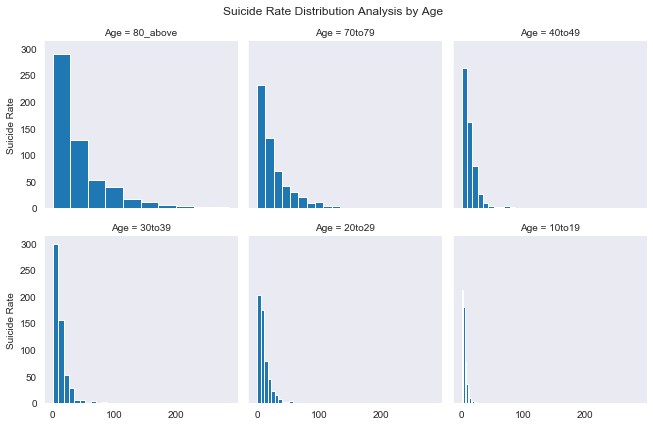

In [28]:
# Plotting the suicide rate distribution in FacetGrid
sns.set_style("dark")
g = sns.FacetGrid(suicide_rate_pivot_longer_df, col="Age", col_wrap=3)
g.map_dataframe(plt.hist, x="Suicide_rate")
g.set_axis_labels("", "Suicide Rate")

# This is to adjust the axis and display the main title
# without it, seaborn's facet titles and the main title are overlapped
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Suicide Rate Distribution Analysis by Age")
plt.show()